# NYC Taxi Fare
---

## Table of Content

* [Introduction](#Introduction)
* [Importing Data](#Importing-data)
* [EDA and Feature Engineering](#EDA-and-Feature-Engineering)
* [Model Creation](#Model-Creation)
    * [Simple Linear Regression](#Simple-Linear-Regression)
    * [Decision Tree](#Decision-Tree)
    * [Random Forest](#Random-Forest)
    * [XGBoost](#XGBoost)
* [Hyperparameter Optimization](#Hyperparameter-Optimization)
* [Saving model](#Saving-model)
* [Deployment Steps](#Deployment-Steps)

---

### Introduction

In this playground competition, hosted in partnership with Google Cloud and Coursera, you are tasked with predicting the fare amount (inclusive of tolls) for a taxi ride in New York City given the pickup and dropoff locations. While you can get a basic estimate based on just the distance between the two points, this will result in an RMSE of $5-$8, depending on the model used (see the starter code for an example of this approach in Kernels). Your challenge is to do better than this using Machine Learning techniques!

---

##### Features
* pickup_datetime - timestamp value indicating when the taxi ride started.
* pickup_longitude - float for longitude coordinate of where the taxi ride started.
* pickup_latitude - float for latitude coordinate of where the taxi ride started.
* dropoff_longitude - float for longitude coordinate of where the taxi ride ended.
* dropoff_latitude - float for latitude coordinate of where the taxi ride ended.
* passenger_count - integer indicating the number of passengers in the taxi ride.

##### Target

* fare_amount - float dollar amount of the cost of the taxi ride. This value is only in the training set; this is what you are predicting in the test set and it is required in your submission CSV.

##### Data
[NYC Taxi Fares dataset](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set()

---
### Importing data
---
NYC Taxi Fare dataset extension is ```.csv```

Use ```pd.read_csv()``` command to read dataset.

In [2]:
data = pd.read_csv("NYCTaxiFares.csv")

In [3]:
data.head()

pickup_datetime  fare_amount  fare_class  pickup_longitude  \
0  2010-04-19 08:17:56 UTC          6.5           0        -73.992365   
1  2010-04-17 15:43:53 UTC          6.9           0        -73.990078   
2  2010-04-17 11:23:26 UTC         10.1           1        -73.994149   
3  2010-04-11 21:25:03 UTC          8.9           0        -73.990485   
4  2010-04-17 02:19:01 UTC         19.7           1        -73.990976   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.730521         -73.975499         40.744746                1  
1        40.740558         -73.974232         40.744114                1  
2        40.751118         -73.960064         40.766235                2  
3        40.756422         -73.971205         40.748192                1  
4        40.734202         -73.905956         40.743115                1

In [4]:
data.tail()

pickup_datetime  fare_amount  fare_class  pickup_longitude  \
119995  2010-04-18 14:33:03 UTC         15.3           1        -73.955857   
119996  2010-04-23 10:27:48 UTC         15.3           1        -73.996329   
119997  2010-04-18 18:50:40 UTC         12.5           1        -73.988574   
119998  2010-04-13 08:14:44 UTC          4.9           0        -74.004449   
119999  2010-04-17 16:00:14 UTC          5.3           0        -73.955415   

        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
119995        40.784590         -73.981941         40.736789                1  
119996        40.772727         -74.049890         40.740413                1  
119997        40.749772         -74.011541         40.707799                3  
119998        40.724529         -73.992697         40.730765                1  
119999        40.771920         -73.967623         40.763015                3

---
### EDA and Feature Engineering
---
##### Following steps are done:
1. Extracting data information
2. Describing all features of data
3. Checking Null value exists or not?
4. Insights of "fare_class"
5. Changing data type of "pickup_datetime" to TimeStamp
6. Calculation of distance using Longitude and Latitude
7. Mapping days and Weekname
8. Average Fare vs Weekdays
9. Fare vs Pickup time
10. Fare vs Distance
11. Total passanger travelling in a Taxi, paying Fare amount less than or more than $10.
12. Number of passsenger vs Total Fare of Taxi
13. Saving transformed data

In [5]:
# Information of data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


In [6]:
# Description of all features

data.describe().T

count       mean       std        min        25%  \
fare_amount        120000.0  10.040326  7.500134   2.500000   5.700000   
fare_class         120000.0   0.333333  0.471406   0.000000   0.000000   
pickup_longitude   120000.0 -73.976626  0.031497 -74.465447 -73.992386   
pickup_latitude    120000.0  40.751443  0.025821  40.121653  40.736594   
dropoff_longitude  120000.0 -73.974501  0.032419 -74.443323 -73.991478   
dropoff_latitude   120000.0  40.751695  0.030279  40.164927  40.735914   
passenger_count    120000.0   1.347167  0.759263   1.000000   1.000000   

                         50%       75%        max  
fare_amount         7.700000  11.30000  49.900000  
fare_class          0.000000   1.00000   1.000000  
pickup_longitude  -73.982084 -73.96871 -73.311845  
pickup_latitude    40.753661  40.76802  40.981292  
dropoff_longitude -73.980411 -73.96550 -73.496140  
dropoff_latitude   40.754441  40.76888  40.993498  
passenger_count     1.000000   1.00000   5.000000

In [7]:
# Checking Null values

data.isnull().sum()

pickup_datetime      0
fare_amount          0
fare_class           0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [8]:
# Counts of fare_class feature

data["fare_class"].value_counts()

0    80000
1    40000
Name: fare_class, dtype: int64

In [9]:
# fare_class feature tells fare_amount being greater than 10 dollars

print("Fare Amount greater than $10 : ",data[data["fare_amount"] >=10 ].shape[0])
data[data["fare_amount"] >=10 ]

Fare Amount greater than $10 :  40000


pickup_datetime  fare_amount  fare_class  pickup_longitude  \
2       2010-04-17 11:23:26 UTC         10.1           1        -73.994149   
4       2010-04-17 02:19:01 UTC         19.7           1        -73.990976   
12      2010-04-23 12:12:08 UTC         17.3           1        -73.997107   
16      2010-04-15 21:54:26 UTC         14.1           1        -74.002233   
20      2010-04-20 11:27:29 UTC         36.0           1        -73.874537   
...                         ...          ...         ...               ...   
119989  2010-04-17 19:19:19 UTC         11.7           1        -74.001573   
119991  2010-04-12 16:43:37 UTC         11.3           1        -73.975583   
119995  2010-04-18 14:33:03 UTC         15.3           1        -73.955857   
119996  2010-04-23 10:27:48 UTC         15.3           1        -73.996329   
119997  2010-04-18 18:50:40 UTC         12.5           1        -73.988574   

        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
2             40.751118         -73.960064         40.766235                2  
4             40.734202         -73.905956         40.743115                1  
12            40.722116         -73.976628         40.775252                1  
16            40.734468         -73.961872         40.764459                2  
20            40.774075         -73.985187         40.760783                1  
...                 ...                ...               ...              ...  
119989        40.727515         -73.967402         40.763441                1  
119991        40.760748         -73.984528         40.742072                1  
119995        40.784590         -73.981941         40.736789                1  
119996        40.772727         -74.049890         40.740413                1  
119997        40.749772         -74.011541         40.707799                3  

[40000 rows x 8 columns]

In [10]:
# Converting pickup_datetime from Object type to TimeStamp type

data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"])

In [11]:
data.head()

pickup_datetime  fare_amount  fare_class  pickup_longitude  \
0 2010-04-19 08:17:56+00:00          6.5           0        -73.992365   
1 2010-04-17 15:43:53+00:00          6.9           0        -73.990078   
2 2010-04-17 11:23:26+00:00         10.1           1        -73.994149   
3 2010-04-11 21:25:03+00:00          8.9           0        -73.990485   
4 2010-04-17 02:19:01+00:00         19.7           1        -73.990976   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.730521         -73.975499         40.744746                1  
1        40.740558         -73.974232         40.744114                1  
2        40.751118         -73.960064         40.766235                2  
3        40.756422         -73.971205         40.748192                1  
4        40.734202         -73.905956         40.743115                1

In [12]:
data.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

##### Calculation of distance using Longitude and Latitude

The great circle distance or the orthodromic distance is the shortest distance between two points on a sphere (or the surface of Earth). In order to use this method, we need to have the co-ordinates of point A and point B.The great circle method is chosen over other methods.

First, convert the latitude and longitude values from decimal degrees to radians. For this divide the values of longitude and latitude of both the points by 180/pi. The value of pi is 22/7. The value of 180/pi is approximately 57.29577951. If we want to calculate the distance between two places in miles, use the value 3, 963, which is the radius of Earth. If we want to calculate the distance between two places in kilometers, use the value 6, 378.8, which is the radius of Earth.

Find the value of the latitude in radians:

Value of Latitude in Radians, lat = Latitude / (180/pi) OR

Value of Latitude in Radians, lat = Latitude / 57.29577951

Find the value of longitude in radians:

Value of Longitude in Radians, long = Longitude / (180/pi) OR

Value of Longitude in Radians, long = Longitude / 57.29577951

Get the co-ordinates of point A in terms of latitude and longitude. Use the above conversion method to convert the values of latitude and longitude in radians. I will call it as lat1 and long1. Do the same for the co-ordinates of Point B and get lat2 and long2.

Now, to get the distance between point A and point B use the following formula:

```Distance, d = 3963.0 * arccos[(sin(lat1) * sin(lat2)) + cos(lat1) * cos(lat2) * cos(long2 – long1)]```

The obtained distance, d, is in miles. If you want your value to be in units of kilometers, multiple d by 1.609344.

```d in kilometers = 1.609344 * d in miles```

Thus you can have the shortest distance between two places on Earth using the great circle distance approach.

Reference : [geeksforgeeks](https://www.geeksforgeeks.org/program-distance-two-points-earth/#:~:text=For%20this%20divide%20the%20values,is%20the%20radius%20of%20Earth.)

In [13]:
from math import radians, cos, sin, asin, sqrt 
def distance(lat1, lat2, lon1, lon2): 
      
    # The math module contains a function named 
    # radians which converts from degrees to radians. 
    lon1 = radians(lon1) 
    lon2 = radians(lon2) 
    lat1 = radians(lat1) 
    lat2 = radians(lat2) 
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a))  
     
    # Radius of earth in kilometers. Use 3956 for miles 
    r = 6371
       
    # calculate the result 
    return (round(c * r, 2))
      
      
# driver code  
d = []
for i in range(data.shape[0]):
    d.append(distance(data["pickup_latitude"][i], 
                      data["dropoff_latitude"][i], 
                      data["pickup_longitude"][i], 
                      data["dropoff_longitude"][i]))

In [14]:
data["distance_in_kms"] = d

In [15]:
data.head()

pickup_datetime  fare_amount  fare_class  pickup_longitude  \
0 2010-04-19 08:17:56+00:00          6.5           0        -73.992365   
1 2010-04-17 15:43:53+00:00          6.9           0        -73.990078   
2 2010-04-17 11:23:26+00:00         10.1           1        -73.994149   
3 2010-04-11 21:25:03+00:00          8.9           0        -73.990485   
4 2010-04-17 02:19:01+00:00         19.7           1        -73.990976   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0        40.730521         -73.975499         40.744746                1   
1        40.740558         -73.974232         40.744114                1   
2        40.751118         -73.960064         40.766235                2   
3        40.756422         -73.971205         40.748192                1   
4        40.734202         -73.905956         40.743115                1   

   distance_in_kms  
0             2.13  
1             1.39  
2             3.33  
3             1.86  
4             7.23

In [16]:
# Dropping Longitude and Latitude Features

data.drop(["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"], axis = 1, inplace = True)

In [17]:
data.head()

pickup_datetime  fare_amount  fare_class  passenger_count  \
0 2010-04-19 08:17:56+00:00          6.5           0                1   
1 2010-04-17 15:43:53+00:00          6.9           0                1   
2 2010-04-17 11:23:26+00:00         10.1           1                2   
3 2010-04-11 21:25:03+00:00          8.9           0                1   
4 2010-04-17 02:19:01+00:00         19.7           1                1   

   distance_in_kms  
0             2.13  
1             1.39  
2             3.33  
3             1.86  
4             7.23

In [18]:
# Checking Unique values in "pickup_datetime"

print("Date in data : ", data["pickup_datetime"].dt.day.sort_values().unique())
print("Month in data : ", data["pickup_datetime"].dt.month.unique()[0])
print("Year in data : ", data["pickup_datetime"].dt.year.unique()[0])

Date in data :  [11 12 13 14 15 16 17 18 19 20 21 22 23 24 25]
Month in data :  4
Year in data :  2010


In [19]:
# Mapping days and Weekname

week_names = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}

data["Weekday_name"] = data["pickup_datetime"].dt.weekday.map(week_names)

In [20]:
data.head()

pickup_datetime  fare_amount  fare_class  passenger_count  \
0 2010-04-19 08:17:56+00:00          6.5           0                1   
1 2010-04-17 15:43:53+00:00          6.9           0                1   
2 2010-04-17 11:23:26+00:00         10.1           1                2   
3 2010-04-11 21:25:03+00:00          8.9           0                1   
4 2010-04-17 02:19:01+00:00         19.7           1                1   

   distance_in_kms Weekday_name  
0             2.13       Sunday  
1             1.39       Friday  
2             3.33       Friday  
3             1.86     Saturday  
4             7.23       Friday

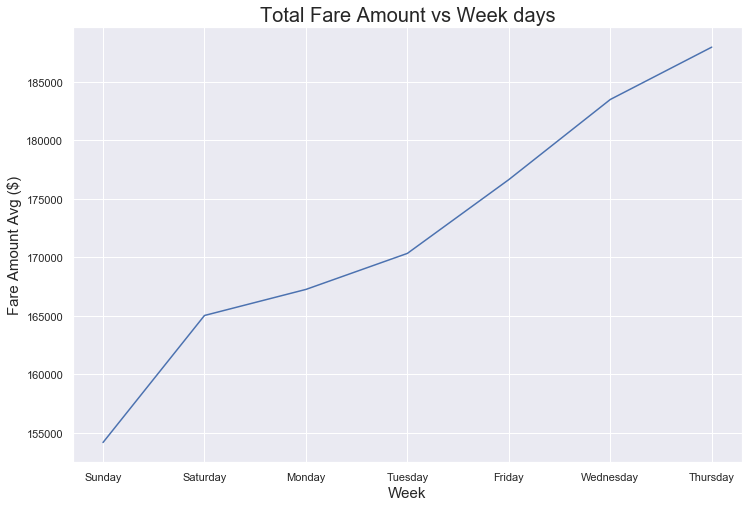

In [21]:
# Plotting graph of Average Fare vs Weekdays

plt.figure(figsize = (12, 8))

data.groupby("Weekday_name")["fare_amount"].sum().sort_values().plot()
plt.xlabel("Week", fontsize=15)
plt.ylabel("Fare Amount Avg ($)", fontsize=15)
plt.title("Total Fare Amount vs Week days", fontsize=20)
plt.show()

In [22]:
week_names_encode = {"Sunday": 1, "Saturday": 2, "Monday": 3, "Tuesday": 4, "Friday": 5, "Wednesday": 6, "Thursday": 7}

data["Weekday_name"] = data["Weekday_name"].map(week_names_encode)

In [23]:
data.head()

pickup_datetime  fare_amount  fare_class  passenger_count  \
0 2010-04-19 08:17:56+00:00          6.5           0                1   
1 2010-04-17 15:43:53+00:00          6.9           0                1   
2 2010-04-17 11:23:26+00:00         10.1           1                2   
3 2010-04-11 21:25:03+00:00          8.9           0                1   
4 2010-04-17 02:19:01+00:00         19.7           1                1   

   distance_in_kms  Weekday_name  
0             2.13             1  
1             1.39             5  
2             3.33             5  
3             1.86             2  
4             7.23             5

In [24]:
# Creating "Hour" column

data["Hour"] = data["pickup_datetime"].dt.hour

In [25]:
data["Hour"].unique()

array([ 8, 15, 11, 21,  2, 19,  9, 18, 22, 17, 12, 10, 23,  1, 13, 16, 14,
        0, 20,  3,  7,  4,  6,  5], dtype=int64)

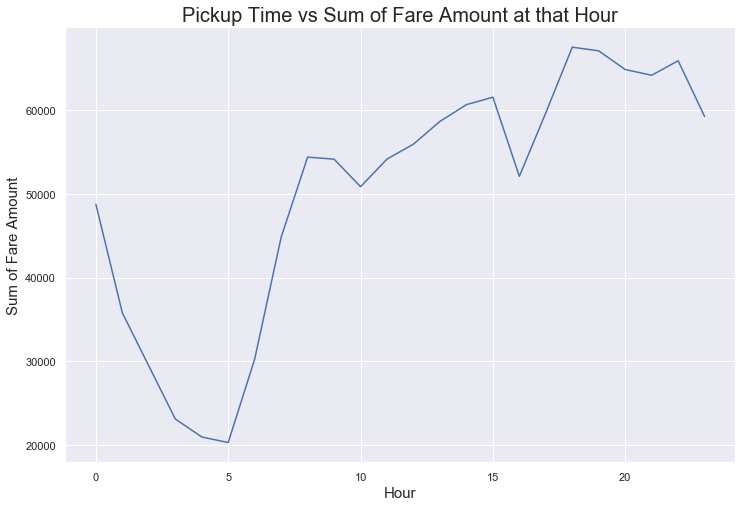

In [26]:
# Plotting graph of Fare vs Pickup time

plt.figure(figsize = (12, 8))

data.groupby("Hour")["fare_amount"].sum().plot()
plt.title("Pickup Time vs Sum of Fare Amount at that Hour", fontsize=20)
plt.xlabel("Hour", fontsize=15)
plt.ylabel("Sum of Fare Amount", fontsize=15)
plt.show()

In [27]:
data["Month_Day"] = data["pickup_datetime"].dt.day

In [28]:
# Sum of Taxi Fare in a particular day

for day in list(data["pickup_datetime"].dt.day.sort_values().unique()):
    print(f"Date : {day} \t Total Fare Amount : ${round(data[data.pickup_datetime.dt.day == day].fare_amount.sum(), 2)}")

Date : 11 	 Total Fare Amount : $64911.95
Date : 12 	 Total Fare Amount : $77483.5
Date : 13 	 Total Fare Amount : $84961.02
Date : 14 	 Total Fare Amount : $85054.18
Date : 15 	 Total Fare Amount : $91743.83
Date : 16 	 Total Fare Amount : $94096.09
Date : 17 	 Total Fare Amount : $87853.61
Date : 18 	 Total Fare Amount : $82439.11
Date : 19 	 Total Fare Amount : $76683.18
Date : 20 	 Total Fare Amount : $82287.96
Date : 21 	 Total Fare Amount : $85274.48
Date : 22 	 Total Fare Amount : $91738.54
Date : 23 	 Total Fare Amount : $93860.29
Date : 24 	 Total Fare Amount : $88780.99
Date : 25 	 Total Fare Amount : $17670.4


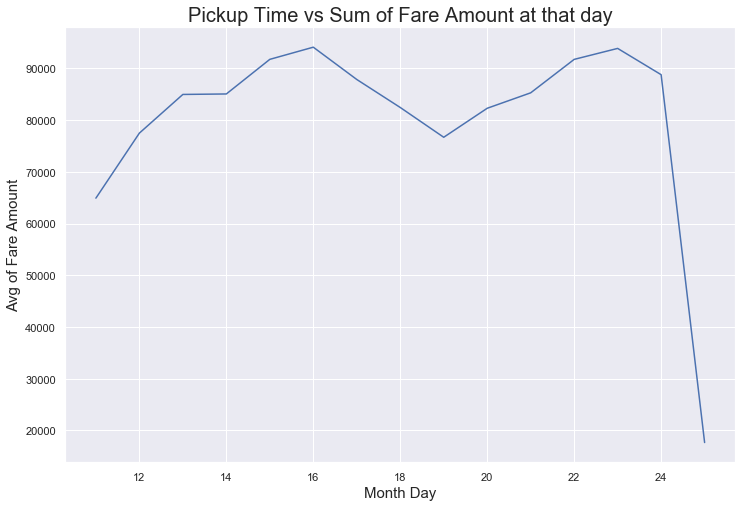

In [29]:
# Plotting graph of Fare vs Month Day

plt.figure(figsize = (12, 8))

data.groupby("Month_Day")["fare_amount"].sum().plot()
plt.title("Pickup Time vs Sum of Fare Amount at that day", fontsize=20)
plt.xlabel("Month Day", fontsize=15)
plt.ylabel("Avg of Fare Amount", fontsize=15)
plt.show()

In [30]:
data.head()

pickup_datetime  fare_amount  fare_class  passenger_count  \
0 2010-04-19 08:17:56+00:00          6.5           0                1   
1 2010-04-17 15:43:53+00:00          6.9           0                1   
2 2010-04-17 11:23:26+00:00         10.1           1                2   
3 2010-04-11 21:25:03+00:00          8.9           0                1   
4 2010-04-17 02:19:01+00:00         19.7           1                1   

   distance_in_kms  Weekday_name  Hour  Month_Day  
0             2.13             1     8         19  
1             1.39             5    15         17  
2             3.33             5    11         17  
3             1.86             2    21         11  
4             7.23             5     2         17

In [31]:
data["passenger_count"].value_counts()

1    92531
2    18650
3     4874
4     2518
5     1427
Name: passenger_count, dtype: int64

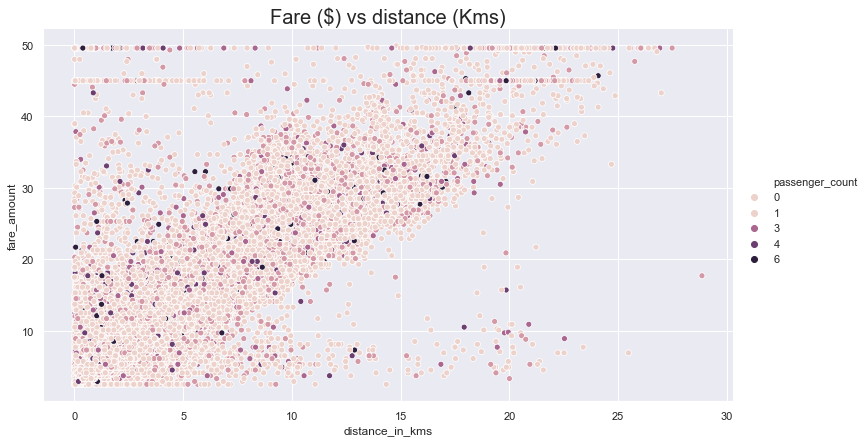

In [32]:
# Graph - Fare vs Distance

sns.relplot(data = data, kind = "scatter", x = "distance_in_kms", y = "fare_amount", 
            hue = "passenger_count", height=6, aspect=1.75,)
plt.title("Fare ($) vs distance (Kms)", fontsize=20)
plt.show()

In [33]:
data.head()

pickup_datetime  fare_amount  fare_class  passenger_count  \
0 2010-04-19 08:17:56+00:00          6.5           0                1   
1 2010-04-17 15:43:53+00:00          6.9           0                1   
2 2010-04-17 11:23:26+00:00         10.1           1                2   
3 2010-04-11 21:25:03+00:00          8.9           0                1   
4 2010-04-17 02:19:01+00:00         19.7           1                1   

   distance_in_kms  Weekday_name  Hour  Month_Day  
0             2.13             1     8         19  
1             1.39             5    15         17  
2             3.33             5    11         17  
3             1.86             2    21         11  
4             7.23             5     2         17

In [34]:
data["fare_class"].unique()

array([0, 1], dtype=int64)

In [35]:
# Total passenger travelling in a Taxi, paying Fare amount less than or more than $10.

data.groupby(["fare_class", "passenger_count"])[["passenger_count"]].sum()

passenger_count
fare_class passenger_count                 
0          1                          62591
           2                          23588
           3                           9426
           4                           6288
           5                           4505
1          1                          29940
           2                          13712
           3                           5196
           4                           3784
           5                           2630

In [36]:
data.head()

pickup_datetime  fare_amount  fare_class  passenger_count  \
0 2010-04-19 08:17:56+00:00          6.5           0                1   
1 2010-04-17 15:43:53+00:00          6.9           0                1   
2 2010-04-17 11:23:26+00:00         10.1           1                2   
3 2010-04-11 21:25:03+00:00          8.9           0                1   
4 2010-04-17 02:19:01+00:00         19.7           1                1   

   distance_in_kms  Weekday_name  Hour  Month_Day  
0             2.13             1     8         19  
1             1.39             5    15         17  
2             3.33             5    11         17  
3             1.86             2    21         11  
4             7.23             5     2         17

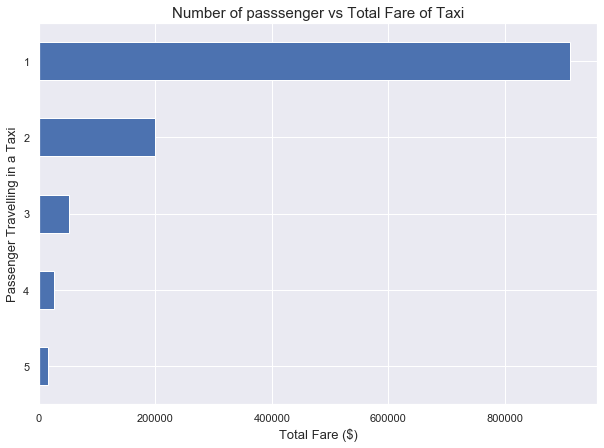

In [37]:
# Number of passsenger vs Total Fare of Taxi

plt.figure(figsize = (10,7))
data.groupby(["passenger_count"])["fare_amount"].sum().sort_values().plot.barh()
plt.title("Number of passsenger vs Total Fare of Taxi", fontsize = 15)
plt.xlabel("Total Fare ($)", fontsize = 13)
plt.ylabel("Passenger Travelling in a Taxi", fontsize = 13)
plt.show()

In [38]:
# Dropping pickup_datetime

data.drop("pickup_datetime", axis = 1, inplace = True)

In [39]:
data.head()

fare_amount  fare_class  passenger_count  distance_in_kms  Weekday_name  \
0          6.5           0                1             2.13             1   
1          6.9           0                1             1.39             5   
2         10.1           1                2             3.33             5   
3          8.9           0                1             1.86             2   
4         19.7           1                1             7.23             5   

   Hour  Month_Day  
0     8         19  
1    15         17  
2    11         17  
3    21         11  
4     2         17

In [40]:
# import scipy.stats as stat
# import pylab

In [41]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
# def plot_data(df,feature):
#     plt.figure(figsize=(10,6))
#     plt.subplot(1,2,1)
#     df[feature].hist()
#     plt.subplot(1,2,2)
#     stat.probplot(df[feature],dist='norm',plot=pylab)
#     plt.show()

In [42]:
# for feature in data.columns:
#     plot_data(data, feature)

In [43]:
# Saving data

data.to_csv("data_transformed.csv", index = False)

---
### Model Creation
---

##### Steps done:
* Separating dependent and independent feature
* Splitting data into train and test set
* Simple Linear Regression
* Decision Tree
* Random Forest
* XGBoost


In [44]:
df = pd.read_csv("data_transformed.csv")

In [45]:
df.head()

fare_amount  fare_class  passenger_count  distance_in_kms  Weekday_name  \
0          6.5           0                1             2.13             1   
1          6.9           0                1             1.39             5   
2         10.1           1                2             3.33             5   
3          8.9           0                1             1.86             2   
4         19.7           1                1             7.23             5   

   Hour  Month_Day  
0     8         19  
1    15         17  
2    11         17  
3    21         11  
4     2         17

In [46]:
# Separating dependent and independent feature
#### Dependent Feature ---> fare_amount (Continuous -- Regression Problem)

X = df.iloc[:, 1:]
y = df.iloc[:, 0:1]

In [47]:
X.head()

fare_class  passenger_count  distance_in_kms  Weekday_name  Hour  Month_Day
0           0                1             2.13             1     8         19
1           0                1             1.39             5    15         17
2           1                2             3.33             5    11         17
3           0                1             1.86             2    21         11
4           1                1             7.23             5     2         17

In [48]:
y.head()

fare_amount
0          6.5
1          6.9
2         10.1
3          8.9
4         19.7

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

##### Simple Linear Regression

x1, x2, ... = Independent Features <br>
b0 = Bias term (Intercept)

Y = Dependent Feature <br>
Y(pred) = b0 + b1*x1 + b2*x2 + ...

```Error = (Y(pred) - Y)**2```


In [50]:
# Intialising model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True, normalize=True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [51]:
# Predicting
y_pred = regressor.predict(X_test)

In [52]:
# R2_Score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8199509315975058

##### Decision Tree

* Decision trees use a criteria (there are multiple criteria available) to decide to split a node in two or more sub-nodes
* The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable
* Decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.

In [53]:
# Initialising model

from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [54]:
# Prediction and Score
y_pred = decision_tree.predict(X_test)
r2_score(y_test, y_pred)

0.7566572873504056

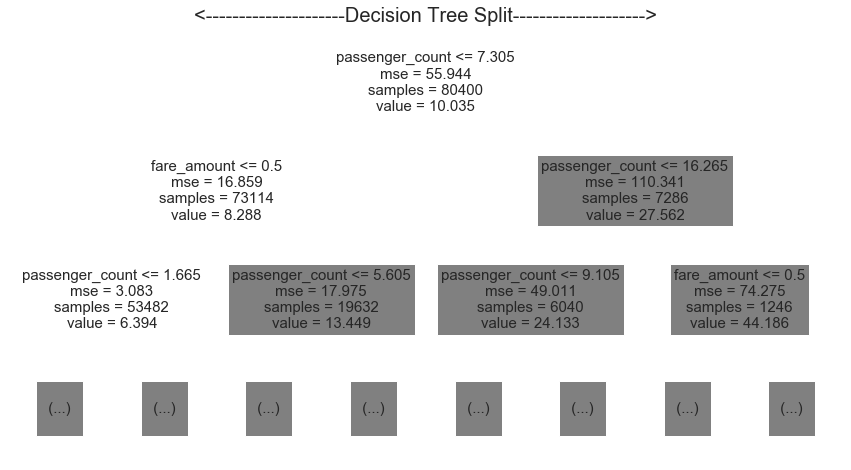

In [55]:
# Decision plot
from sklearn import tree
plt.figure(figsize = (15,8))
tree.plot_tree(decision_tree, max_depth = 2, fontsize = 15, feature_names=df.columns)
plt.title("<---------------------Decision Tree Split-------------------->", fontsize = 20)
plt.show()

##### Random Forest

Random forest is a **ensemble technique** (Bootstrap Aggregation) where "n" number of sample is taken from training data to predict the output.

* Sample of rows is taken for each model
* Voting is taken from different model in order to predict the output
* If we compute single Decision tree to complete depth then it leads to **Low bias and High Variance (Overfitting)**
* This overfitting is overcomed by Random Forest due to splitting of sample data into multiple Decision Trees, therefore creating low variance.



In [56]:
# Initialising model

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=20)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [57]:
# Prediction and Score
y_pred = forest.predict(X_test)
r2_score(y_test, y_pred)

0.8554590847305883

##### XGBoost

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM).

The model in supervised learning usually refers to the mathematical structure of by which the prediction yi is made from the input xi. A common example is a linear model, where the prediction is given as **y^i=∑jθjxij**, a linear combination of weighted input features. The prediction value can have different interpretations, depending on the task, i.e., regression or classification. For example, it can be logistic transformed to get the probability of positive class in logistic regression, and it can also be used as a ranking score when we want to rank the outputs.

The parameters are the undetermined part that we need to learn from data. In linear regression problems, the parameters are the coefficients θ. Usually we will use θ to denote the parameters (there are many parameters in a model, our definition here is sloppy).

In [58]:
# Initialising model

from xgboost import XGBRegressor
xgboost_regressor = XGBRegressor()
xgboost_regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [59]:
# Prediction and Score
y_pred = xgboost_regressor.predict(X_test)
r2_score(y_test, y_pred)

0.8749917347825378

---
### Hyperparameter Optimization
---


##### Random Forest

from sklearn.model_selection import KFold, RandomizedSearchCV

1. Number of trees in random forest:
    * n_estimators = [40, 80, 120, 200]

2. Function to measure the quality of a split:
    * criterion = ["mse", "mae"]

3. Maximum number of levels in tree:
    * max_depth = [int(x) for x in np.linspace(10, 200,10)]

4. Minimum number of samples required to split a node:
    * min_samples_split = [5, 10, 14]

5. Minimum number of samples required at each leaf node:
    * min_samples_leaf = [4, 6, 8, 10]

6. Number of features to consider at every split:
    * max_features = ['auto', 'sqrt','log2']

7. random_search = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "max_features": max_features,
    }


8. Best parameters after hyperparameter tuning:

    rf_randomcv.best_params_
    best_random_grid=rf_randomcv.best_estimator_

    rf_hyper=RandomForestRegressor()
    rf_randomcv=RandomizedSearchCV(estimator=rf_hyper,param_distributions=random_search, n_iter=50, cv = 2, verbose=1,
    random_state=100, n_jobs=-1)
                               
##### Fit the randomized model

rf_randomcv.fit(X_train,y_train)

##### XGBoost

Checkout my blog :    [XGBoost Hyperparameter tunning](https://towardsdatascience.com/simple-implementation-of-xgboost-and-its-hyperparameter-tunning-1773b2dfa181)

---
### Saving model
---

In [60]:
import pickle

# Save the trained model as a pickle string. 
filename = 'rf_NYCTaxiFare_model.pkl'
pickle.dump(forest, open(filename, 'wb'))

---
### Deployment Steps
---

1. Create new environment for deployement.  Refer : [Create new environment](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html)

2. Use ```[x for x in request.form.values()]``` to get values from Front-end form

3. Donot including **fare_class**. Use if statement using distance (eg. if distance > 5kms then fare_class = 1)

4. Check sklearn version : ```sklearn.__version__```
    ---> Most important step
    
5. Install sklearn (version as above)

6. Generate requirements.txt file by executing ```pip freeze > requirements.txt```

7. Install gunicorn by ```pip install gunicorn```

8. Create Prockfile ```web: gunicorn app:app```

9. Check logs in Heroku to get exact ERROR

